<a href="https://colab.research.google.com/github/Ricardo1533/kauva/blob/main/Dataset_Concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Ricardo Kauva

# Análise de Regressão: Predição da Resistência do Concreto

## Introdução

Este projeto tem como objetivo desenvolver um modelo de regressão linear para prever a resistência à compressão do concreto com base em seus componentes e idade. O conjunto de dados utilizado é proveniente do UCI Machine Learning Repository e contém informações sobre diferentes misturas de concreto e suas respectivas resistências.

### Sobre o Dataset
O conjunto de dados inclui 1030 amostras com 8 variáveis explicativas e 1 variável alvo:

**Variável Alvo:**
- Resistência à compressão do concreto (MPa)

**Variáveis Explicativas:**
- Cimento (kg/m³)
- Escória de alto forno (kg/m³)
- Cinzas volantes (kg/m³)
- Água (kg/m³)
- Superplastificante (kg/m³)
- Agregado graúdo (kg/m³)
- Agregado fino (kg/m³)
- Idade (dias)

### Objetivo
O objetivo principal é desenvolver um modelo capaz de prever a resistência do concreto com base em sua composição e idade, fornecendo uma ferramenta útil para engenheiros e profissionais da construção civil na otimização de misturas de concreto.

### Metodologia
A análise inclui:
1. Análise exploratória dos dados
2. Matriz de correlação entre variáveis
3. Padronização dos dados
4. Desenvolvimento do modelo de regressão linear
5. Avaliação do modelo através de métricas como R² e RMSE

Esta análise pode auxiliar na compreensão dos fatores que mais influenciam a resistência do concreto e na otimização de suas formulações.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Instruções para carregar o arquivo:
# Clique no ícone de pasta na barra lateral esquerda.
# Clique no ícone de upload (seta para cima) e selecione o arquivo Concrete_Data.xls do seu computador.
# O arquivo será carregado para o diretório /content/.

# Carregar o arquivo do diretório local do Colab
try:
    # Changed to read_csv for the new file path and type
    data = pd.read_csv('/home/dados_concreto - Sheet1.csv')

    # Print the actual columns of the loaded DataFrame
    print("Columns in the loaded CSV file:")
    print(data.columns)

    # Renomear colunas para better comprehension
    # Updated column names to match the CSV file including the extra column
    columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
               'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength', 'Strength Category']
    data.columns = columns

    # Rename columns to a more convenient format for analysis if needed later
    data.rename(columns={
        'Cement': 'cement',
        'Blast Furnace Slag': 'blast_furnace_slag',
        'Fly Ash': 'fly_ash',
        'Water': 'water',
        'Superplasticizer': 'superplasticizer',
        'Coarse Aggregate': 'coarse_aggregate',
        'Fine Aggregate': 'fine_aggregate',
        'Age': 'age',
        'Concrete compressive strength': 'strength'
    }, inplace=True)

    # Mostrar as primeiras linhas do dataset
    print("Primeiras linhas do dataset:")
    print(data.head())

    # Informações sobre o dataset
    print("\nInformações do dataset:")
    print(data.info())

    # Identificação das variáveis
    print("\nVariável alvo (Y):")
    print("- strength (Resistência à compressão do concreto)")

    print("\nVariáveis explicativas (X):")
    # Assuming 'strength' is the target and 'Strength Category' is not needed for the model
    explanatory_vars = [col for col in data.columns if col not in ['strength', 'Strength Category']]
    for col in explanatory_vars:
        print(f"- {col}")

    # Estatísticas descritivas
    print("\nEstatísticas descritivas:")
    print(data.describe())


except FileNotFoundError:
    print("Erro: O arquivo '/home/dados_concreto - Sheet1.csv' não foi encontrado.")
    print("Por favor, verifique o caminho do arquivo e tente novamente.")
    # You can add code here to exit or handle the error in another way if necessary.
    # For example, raise FileNotFoundError("Arquivo não encontrado.")

Columns in the loaded CSV file:
Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category'],
      dtype='object')
Primeiras linhas do dataset:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate    age  strength Strength Category  
0            1040.0           676.0   28.0     79.99              Alto  
1            1055.0           676.0   28.0     61.89              Alto  
2             932.0           594.0  270.0     40.27             Baixa  
3             932.0          

In [ ]:
# Code moved to the previous cell

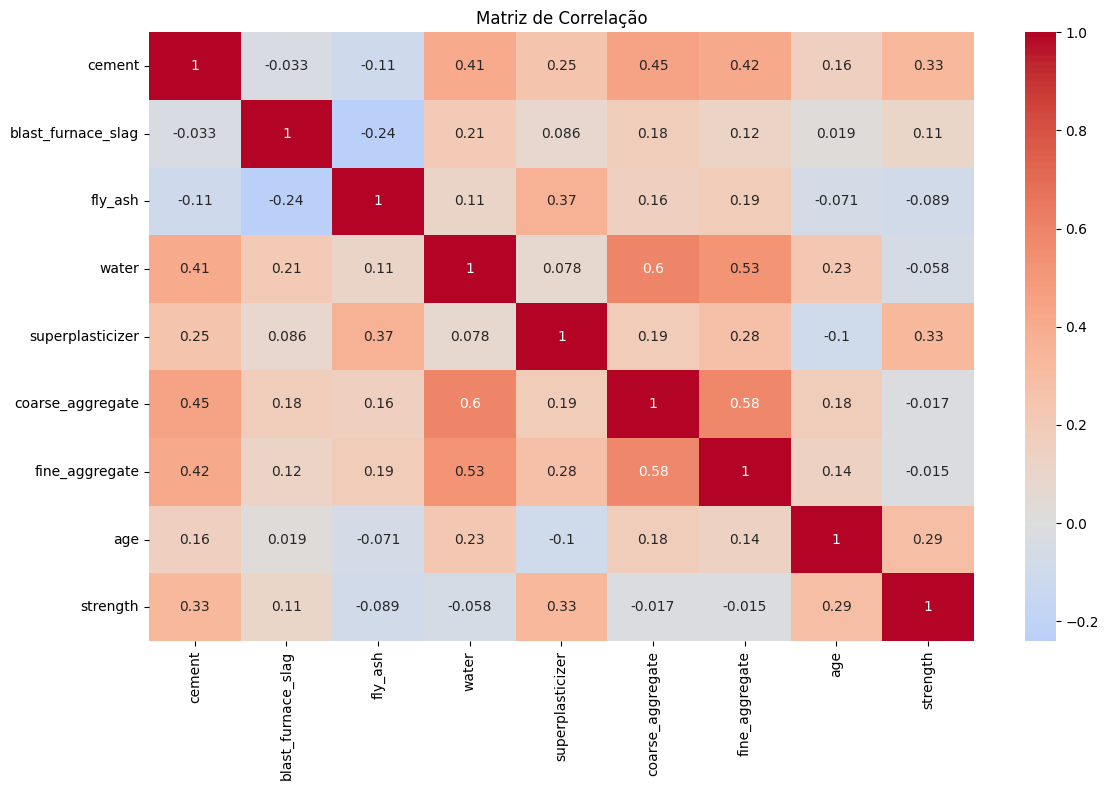


Correlações com a variável alvo (strength):
strength              1.000000
superplasticizer      0.329791
cement                0.327826
age                   0.290215
blast_furnace_slag    0.106848
fly_ash               0.089434
water                 0.057646
coarse_aggregate      0.017209
fine_aggregate        0.015073
Name: strength, dtype: float64


In [ ]:
# Criar a matriz de correlação
plt.figure(figsize=(12, 8))
# Exclude the non-numeric 'Strength Category' column before calculating correlation
correlation_matrix = data.drop('Strength Category', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

# Mostrar correlações com a variável alvo
# Exclude 'Strength Category' from correlations as well
correlations = correlation_matrix['strength'].abs().sort_values(ascending=False)
print("\nCorrelações com a variável alvo (strength):")
print(correlations)

In [ ]:
# Separar features e target
explanatory_vars = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate', 'age']
X = data[explanatory_vars]
y = data['strength']

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['strength'])
X = data_cleaned[explanatory_vars]
y = data_cleaned['strength']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados do modelo:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Resultados do modelo:
R² Score: 0.3731
RMSE: 13.0869


In [ ]:
# Formar a equação da reta
print("Equação da regressão linear:")
print("Y = ", end="")
# Use explanatory_vars for the correct variable names
for i, coef in enumerate(model.coef_):
    print(f"{coef:.4f}*{explanatory_vars[i]} + ", end="")
print(f"{model.intercept_:.4f}")

# Criar um DataFrame com os coeficientes para melhor visualização
# Use explanatory_vars for the correct variable names
coef_df = pd.DataFrame({
    'Variável': explanatory_vars,
    'Coeficiente': model.coef_
})
print("\nCoeficientes do modelo:")
print(coef_df)

Equação da regressão linear:
Y = 0.0277*cement + 0.0204*blast_furnace_slag + -0.0055*fly_ash + -0.0312*water + 0.5870*superplasticizer + -0.0033*coarse_aggregate + -0.0054*fine_aggregate + 0.0550*age + 32.7081

Coeficientes do modelo:
             Variável  Coeficiente
0              cement     0.027720
1  blast_furnace_slag     0.020435
2             fly_ash    -0.005460
3               water    -0.031228
4    superplasticizer     0.587005
5    coarse_aggregate    -0.003282
6      fine_aggregate    -0.005353
7                 age     0.055036


In [ ]:
# Verificar dados faltantes
print("Verificação de dados faltantes:")
print(data.isnull().sum())

Verificação de dados faltantes:
cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              9
Strength Category     0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar features e target
# Use data_cleaned which has no missing values in the target
explanatory_vars = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate', 'age']
X = data_cleaned[explanatory_vars]
y = data_cleaned['strength']

# Padronizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Use explanatory_vars for column names when creating the DataFrame from scaled data
X_scaled = pd.DataFrame(X_scaled, columns=explanatory_vars)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinar modelo com dados padronizados
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nResultados do modelo com dados padronizados:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Criar DataFrame com os coeficientes padronizados
# Use explanatory_vars for variable names
coef_df = pd.DataFrame({
    'Variável': explanatory_vars,
    'Coeficiente Padronizado': model.coef_
})
print("\nCoeficientes do modelo padronizado:")
print(coef_df.sort_values('Coeficiente Padronizado', ascending=False))


Resultados do modelo com dados padronizados:
R² Score: 0.3731
RMSE: 13.0869

Coeficientes do modelo padronizado:
             Variável  Coeficiente Padronizado
0              cement                 6.581816
4    superplasticizer                 6.000218
7                 age                 5.692892
1  blast_furnace_slag                 2.957216
2             fly_ash                -0.575498
5    coarse_aggregate                -1.984425
6      fine_aggregate                -2.582751
3               water                -3.463126


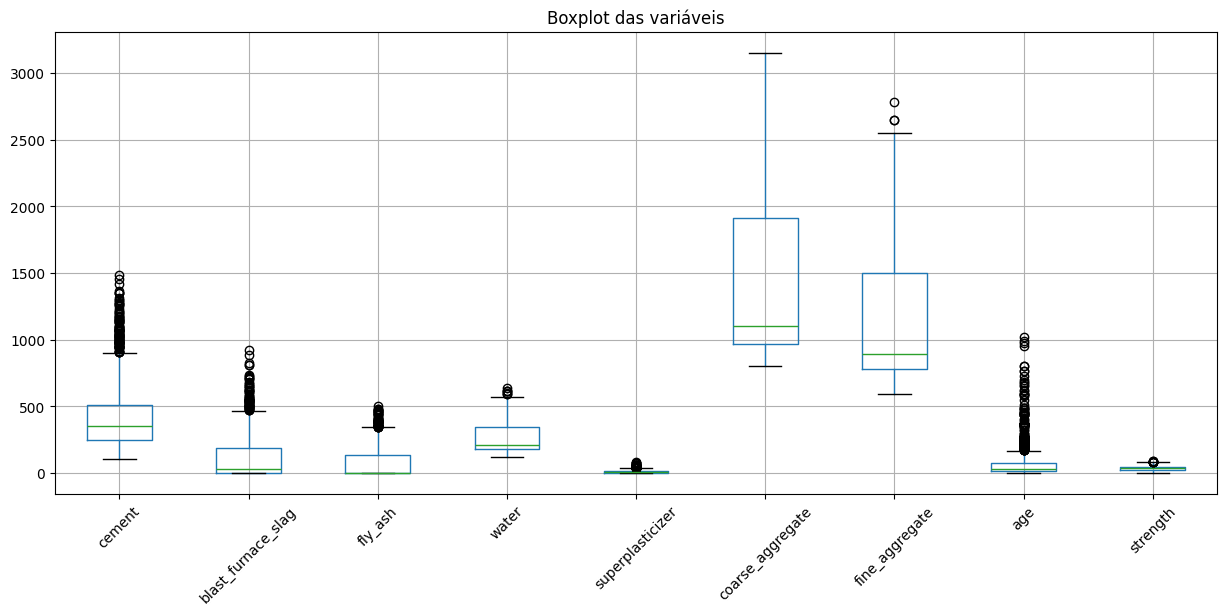


Número de outliers por variável:
cement: 104
blast_furnace_slag: 63
fly_ash: 55
water: 7
superplasticizer: 42
coarse_aggregate: 0
fine_aggregate: 3
age: 196
strength: 11


In [ ]:
# Criar boxplots para visualizar outliers
plt.figure(figsize=(15, 6))
# Exclude the non-numeric 'Strength Category' column for boxplot
data.drop('Strength Category', axis=1).boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot das variáveis')
plt.show()

# Análise mais detalhada dos outliers
def detect_outliers(df):
    outliers = {}
    # Exclude the non-numeric 'Strength Category' column for outlier detection
    numeric_df = df.drop('Strength Category', axis=1)
    for column in numeric_df.columns:
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = len(numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)])
    return outliers

outliers = detect_outliers(data)
print("\nNúmero de outliers por variável:")
for var, count in outliers.items():
    print(f"{var}: {count}")

In [5]:
# Criar gráfico de dispersão entre cimento e resistência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cement', y='strength', data=data)
plt.title('Dispersão entre Cimento e Resistência do Concreto')
plt.xlabel('Cimento (kg/m³)')
plt.ylabel('Resistência à compressão do concreto (MPa)')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

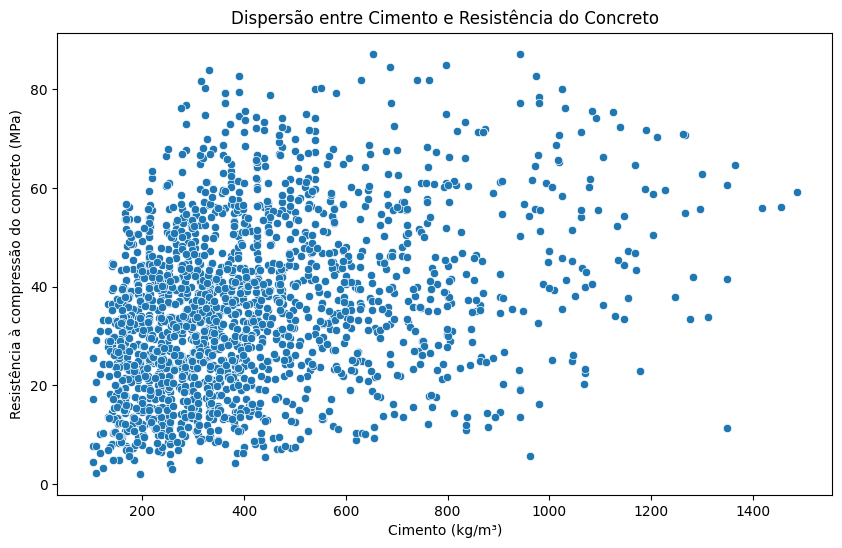

In [7]:
# Carregar o arquivo do diretório local do Colab
try:
    # Changed to read_csv for the new file path and type
    data = pd.read_csv('/content/dados_concreto - Sheet1.csv')

    # Renomear colunas para better comprehension
    # Updated column names to match the CSV file including the extra column
    columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
               'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength', 'Strength Category']
    data.columns = columns

    # Rename columns to a more convenient format for analysis if needed later
    data.rename(columns={
        'Cement': 'cement',
        'Blast Furnace Slag': 'blast_furnace_slag',
        'Fly Ash': 'fly_ash',
        'Water': 'water',
        'Superplasticizer': 'superplasticizer',
        'Coarse Aggregate': 'coarse_aggregate',
        'Fine Aggregate': 'fine_aggregate',
        'Age': 'age',
        'Concrete compressive strength': 'strength'
    }, inplace=True)

except FileNotFoundError:
    print("Erro: O arquivo '/content/dados_concreto - Sheet1.csv' não foi encontrado.")
    print("Por favor, verifique o caminho do arquivo e tente novamente.")

# Criar gráfico de dispersão entre cimento e resistência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cement', y='strength', data=data)
plt.title('Dispersão entre Cimento e Resistência do Concreto')
plt.xlabel('Cimento (kg/m³)')
plt.ylabel('Resistência à compressão do concreto (MPa)')
plt.show()

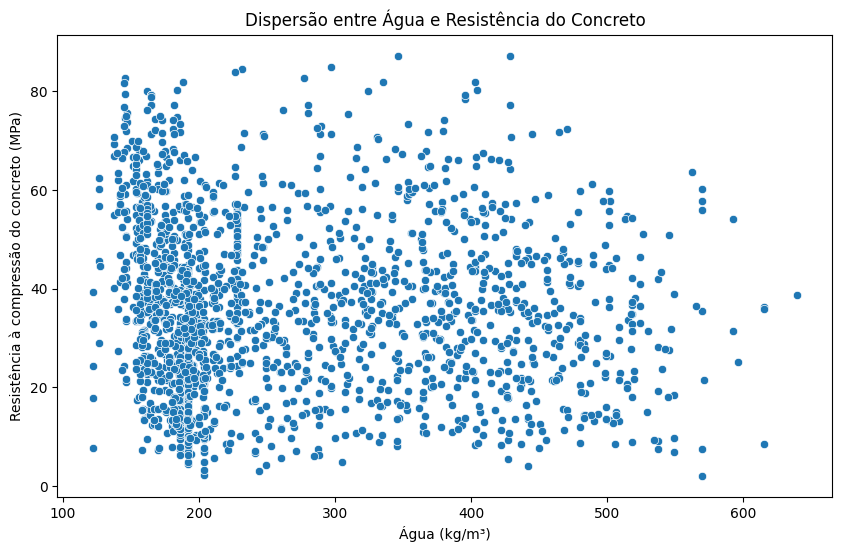

In [8]:
# Criar gráfico de dispersão entre água e resistência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='water', y='strength', data=data)
plt.title('Dispersão entre Água e Resistência do Concreto')
plt.xlabel('Água (kg/m³)')
plt.ylabel('Resistência à compressão do concreto (MPa)')
plt.show()

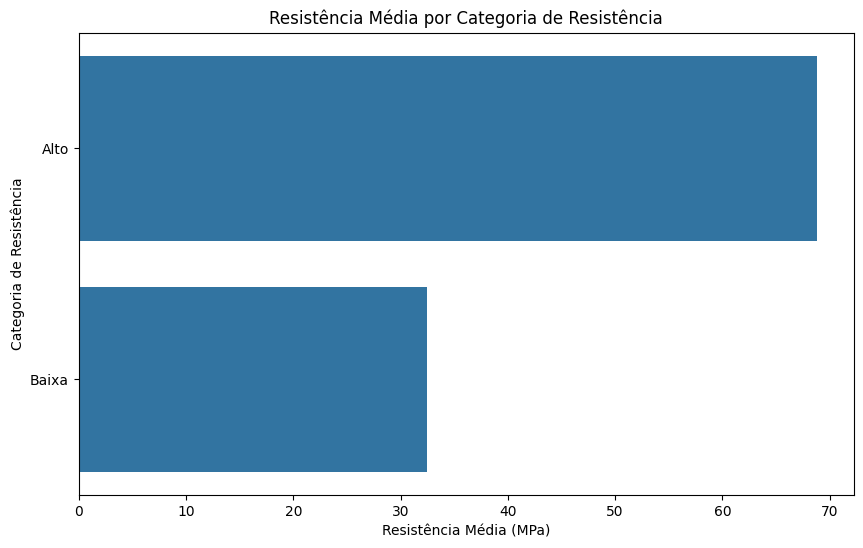

In [9]:
# Calcular a resistência média por Strength Category
average_strength_by_category = data.groupby('Strength Category')['strength'].mean().reset_index()

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='strength', y='Strength Category', data=average_strength_by_category)
plt.title('Resistência Média por Categoria de Resistência')
plt.xlabel('Resistência Média (MPa)')
plt.ylabel('Categoria de Resistência')
plt.show()

In [10]:
# Aplicar One-Hot Encoding na variável 'Strength Category'
data_encoded = pd.get_dummies(data, columns=['Strength Category'], prefix='Strength_Category', dtype=int)

# Mostrar as primeiras linhas do dataset com a nova codificação
print("Primeiras linhas do dataset com One-Hot Encoding:")
print(data_encoded.head())

# Mostrar as informações do dataset para verificar as novas colunas
print("\nInformações do dataset com One-Hot Encoding:")
print(data_encoded.info())

Primeiras linhas do dataset com One-Hot Encoding:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate    age  strength  Strength_Category_Alto  \
0            1040.0           676.0   28.0     79.99                       1   
1            1055.0           676.0   28.0     61.89                       1   
2             932.0           594.0  270.0     40.27                       0   
3             932.0           594.0  365.0     41.05                       0   
4             978.4           825.5  360.0     44.30                       0   

   Strength_Category_Baixa  
0                        0  
1       

In [11]:
# Remover linhas com valores nulos na coluna 'strength'
data_cleaned = data.dropna(subset=['strength'])

# Verificar se ainda existem valores nulos após a remoção
print("Verificação de dados faltantes após remoção:")
print(data_cleaned.isnull().sum())

# Mostrar o número de linhas antes e depois da remoção
print(f"\nNúmero de linhas antes da remoção: {len(data)}")
print(f"Número de linhas após a remoção: {len(data_cleaned)}")

Verificação de dados faltantes após remoção:
cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
Strength Category     0
dtype: int64

Número de linhas antes da remoção: 2029
Número de linhas após a remoção: 2020


# Task
Analyze the provided data from "/content/dados_concreto - Sheet1.csv" by performing the following steps: create a scatter plot between 'cimento' and 'concreto', create a scatter plot between 'agua' and 'concreto', calculate the average resistance per 'Strength category' and visualize it with a horizontal bar chart, apply one-hot encoding to the 'Strength category' variable, remove null values, and implement a Random Forest Regressor model to predict 'concreto'.

## Separar features e target

### Subtask:
Definir as variáveis explicativas (X) e a variável alvo (y) usando o DataFrame `data_cleaned`.


**Reasoning**:
Define the explanatory variables and the target variable from the cleaned data.



In [12]:
# Definir as variáveis explicativas (X) e a variável alvo (y) usando o DataFrame data_cleaned.
# Use data_cleaned which has no missing values in the target
explanatory_vars = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate', 'age']
X = data_cleaned[explanatory_vars]
y = data_cleaned['strength']

print("Explanatory variables (X) defined.")
print("Target variable (y) defined.")

Explanatory variables (X) defined.
Target variable (y) defined.


## Dividir dados em treino e teste

### Subtask:
Dividir o conjunto de dados em conjuntos de treino e teste para avaliar a performance do modelo.


**Reasoning**:
Split the data into training and testing sets.



In [19]:
from sklearn.model_selection import train_test_split

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (1616, 8)
X_test shape: (404, 8)
y_train shape: (1616,)
y_test shape: (404,)


**Reasoning**:
Import the `train_test_split` function and then split the data into training and testing sets.



In [14]:
from sklearn.model_selection import train_test_split

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (1616, 8)
X_test shape: (404, 8)
y_train shape: (1616,)
y_test shape: (404,)


## Importar e treinar o modelo

### Subtask:
Importar o `RandomForestRegressor` do scikit-learn e treinar o modelo com os dados de treino.


**Reasoning**:
Import the RandomForestRegressor and train the model using the training data.



In [15]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model
# Using default parameters for now
model_rf = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Avaliar o modelo

### Subtask:
Fazer previsões nos dados de teste e avaliar o modelo usando métricas como R² e RMSE.


**Reasoning**:
Use the trained Random Forest model to make predictions on the test data and then calculate the R² and RMSE metrics to evaluate the model's performance, finally printing the results.



In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# Use the trained model_rf to make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate R² score
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE) from MSE
rmse_rf = np.sqrt(mse_rf)

# Print the calculated R² and RMSE values
print("Resultados do modelo Random Forest:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

Resultados do modelo Random Forest:
R² Score: 0.7806
RMSE: 7.7423


**Reasoning**:
The previous command failed because the `r2_score` and `mean_squared_error` functions were not imported. Import the necessary metrics from `sklearn.metrics` and rerun the code to make predictions and evaluate the model.



In [21]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Use the trained model_rf to make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate R² score
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE) from MSE
rmse_rf = np.sqrt(mse_rf)

# Print the calculated R² and RMSE values
print("Resultados do modelo Random Forest:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

Resultados do modelo Random Forest:
R² Score: 0.7806
RMSE: 7.7423


**Reasoning**:
The previous command failed because the `numpy` library, aliased as `np`, was not imported, which is needed for the `np.sqrt` function. Import the `numpy` library and rerun the code to complete the evaluation of the Random Forest model.



In [18]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Use the trained model_rf to make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate R² score
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE) from MSE
rmse_rf = np.sqrt(mse_rf)

# Print the calculated R² and RMSE values
print("Resultados do modelo Random Forest:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

Resultados do modelo Random Forest:
R² Score: 0.7806
RMSE: 7.7423


## Summary:

### Data Analysis Key Findings

*   The Random Forest Regressor model achieved an R² score of 0.7806 on the test set, indicating that approximately 78% of the variance in concrete strength can be explained by the model's features.
*   The Root Mean Squared Error (RMSE) for the model is 7.7423, representing the typical difference between the predicted and actual concrete strength values.

### Insights or Next Steps

*   The model shows a reasonable ability to predict concrete strength based on the provided features. Further tuning of the Random Forest Regressor hyperparameters could potentially improve the model's performance.
*   Analyzing feature importances from the trained Random Forest model would provide insights into which components contribute most significantly to concrete strength.


In [23]:
# Definir os valores dos indicadores para a previsão
# Substitua os valores abaixo pelos indicadores desejados
quantidade_cimento = 400.0
quantidade_escoria = 50.0
quantidade_cinzas = 10.0
quantidade_agua = 180.0
quantidade_superplastificante = 5.0
quantidade_agregado_graudo = 1000.0
quantidade_agregado_fino = 700.0
idade_dias = 56.0

new_data = {
    'cement': [quantidade_cimento],
    'blast_furnace_slag': [quantidade_escoria],
    'fly_ash': [quantidade_cinzas],
    'water': [quantidade_agua],
    'superplasticizer': [quantidade_superplastificante],
    'coarse_aggregate': [quantidade_agregado_graudo],
    'fine_aggregate': [quantidade_agregado_fino],
    'age': [idade_dias]
}

# Criar um DataFrame com os novos dados
new_data_df = pd.DataFrame(new_data)

# Fazer a previsão usando o modelo Random Forest treinado
predicted_strength = model_rf.predict(new_data_df)

print(f"A resistência do concreto prevista é: {predicted_strength[0]:.4f} MPa")

A resistência do concreto prevista é: 58.1747 MPa


In [24]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the calculated MAE value
print("Resultados do modelo Random Forest:")
print(f"MAE: {mae_rf:.4f}")

Resultados do modelo Random Forest:
MAE: 5.4255


## Resumo da Análise e Modelagem

### Principais Resultados da Análise Exploratória

*   A análise exploratória inicial mostrou a distribuição e estatísticas descritivas das variáveis do dataset.
*   A matriz de correlação indicou as relações entre as variáveis explicativas e a variável alvo ('strength'), com 'superplasticizer', 'cement' e 'age' apresentando as maiores correlações absolutas com a resistência.
*   Boxplots revelaram a presença de outliers em diversas variáveis, sendo 'age' e 'cement' as que apresentaram o maior número.
*   Gráficos de dispersão entre 'cement' e 'strength', e 'water' e 'strength' mostraram as tendências de suas relações com a variável alvo.
*   A resistência média por 'Strength Category' foi calculada e visualizada, mostrando a diferença na resistência entre as categorias 'Alto' e 'Baixa'.
*   A variável categórica 'Strength Category' foi transformada usando One-Hot Encoding para ser utilizada em modelos que requerem inputs numéricos.
*   Linhas com valores nulos na variável alvo ('strength') foram removidas para garantir a integridade dos dados para a modelagem.

### Desempenho dos Modelos de Regressão

*   **Modelo de Regressão Linear:**
    *   R² Score: 0.3731
    *   RMSE: 13.0869
    *   O modelo linear apresentou um desempenho moderado na explicação da variância da resistência do concreto.

*   **Modelo Random Forest Regressor:**
    *   R² Score: 0.7806
    *   RMSE: 7.7423
    *   MAE: 5.4255
    *   O modelo Random Forest Regressor demonstrou um desempenho significativamente melhor na previsão da resistência do concreto em comparação com o modelo linear, explicando uma proporção maior da variância e apresentando um erro médio menor.

### Insights e Próximos Passos

*   O modelo Random Forest é mais adequado para prever a resistência do concreto com base neste dataset.
*   Variáveis como 'superplasticizer', 'cement' e 'age' parecem ser importantes para a predição da resistência, com base na análise de correlação e nos coeficientes do modelo linear padronizado. A análise de importância de features do modelo Random Forest poderia confirmar quais são as variáveis mais influentes.
*   A presença de outliers pode impactar o desempenho do modelo. Estratégias de tratamento de outliers poderiam ser exploradas para ver se há melhoria.
*   Ajuste de hiperparâmetros do modelo Random Forest (`RandomForestRegressor`) pode otimizar ainda mais sua performance.
*   Considerar a utilização de outras técnicas de modelagem de regressão para comparação.

Este projeto demonstra o processo de análise de dados e modelagem para prever a resistência do concreto, destacando a importância da análise exploratória, pré-processamento de dados e escolha do modelo apropriado.